In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
np.random.seed(42)
n_samples = 30 # n_samples instead of 20 samples

# distributions centered at +- 1.5 instead of +- 1.25
X1 = np.random.normal(loc=-1.5, scale=1, size=n_samples)
X2 = np.random.normal(loc=1.5, scale=1, size=n_samples)
X = np.hstack((X1, X2))

y1 = np.ones(shape=n_samples)
y2 = np.full(n_samples, 2)
y = np.hstack((y1, y2)) # distribution (class) 1 or 2

In [3]:
data = pd.DataFrame({
    'X': X,
    'y': y,
})
data['y'] = data['y'].astype(int)

In [4]:
X = X.reshape(-1, 1)
classifier = LinearDiscriminantAnalysis()
classifier.fit(X, y)

LinearDiscriminantAnalysis()

In [5]:
X_pred = np.linspace(start=-1, stop=1, num=1000).reshape(-1, 1)
y_pred = classifier.predict_proba(X_pred)

In [6]:
decision_boundary_index = abs(y_pred[:, 1] - 0.5).argmin()
decision_boundary = X_pred[decision_boundary_index]

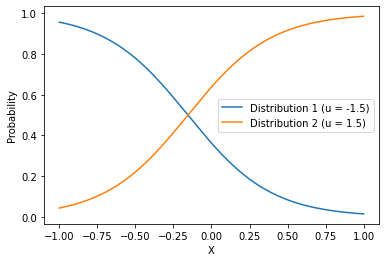

In [7]:
plt.plot(X_pred, y_pred)
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend([
    'Distribution 1 (u = -1.5)', 
    'Distribution 2 (u = 1.5)'
])
plt.show()

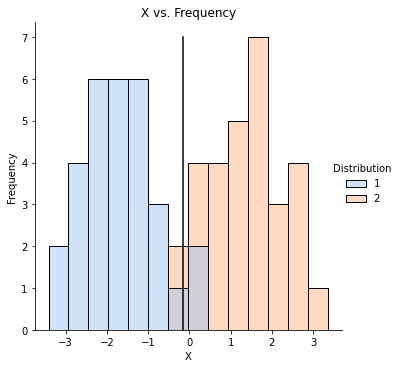

In [16]:
distribution_plot = sns.displot(
    data=data, 
    x='X', 
    bins=14, 
    hue='y', 
    palette='pastel'
)
distribution_plot.set(
    title='X vs. Frequency',
    ylabel='Frequency',
)
# edit seaborn legend https://stackoverflow.com/questions/45201514/
distribution_plot.legend.set_title('Distribution')
plt.plot([decision_boundary, decision_boundary], [0, 7], color='black')
plt.show()